# 1D Standing Wave in a String

The wave equation is,

$$
\frac{\partial^2 u}{\partial t^2} = c^2 \frac{\partial^2 u}{\partial x^2}.
$$

Boundary Conditions,

$$
u(0,t) = 0, \, \, \, u(L,t) = 0.
$$

Initial Conditions,

$$
u(x,0) = \sin (\frac{n \pi x}{L}), \, \, \, \frac{\partial u}{\partial t} = 0
$$

In [5]:
# Import Libraries 
# -----------------------
import numpy as np
import matplotlib
# Show Plot in The Notebook
matplotlib.use("nbagg") # nbagg is used for creating interactive plots
import matplotlib.pyplot as plt

# Sub-plot Configuration
# ----------------------
from matplotlib import gridspec # gridspec is used for creating grid of plots

# Ignore Warning Messages
# -----------------------
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Parameter Configuration 
# -----------------------

nx   = 100      # number of grid points in x-direction
L = 1.      # Length of string (meter)
dx   = L/(nx-1)  # grid point distance in x-direction
c0   = 2.0        # wave speed in medium (m/s)
nt   = 1000         # maximum number of time steps
dt   = 0.0012       # time step

# Snapshot
idisp = 5 # display frequency

<IPython.core.display.Javascript object>


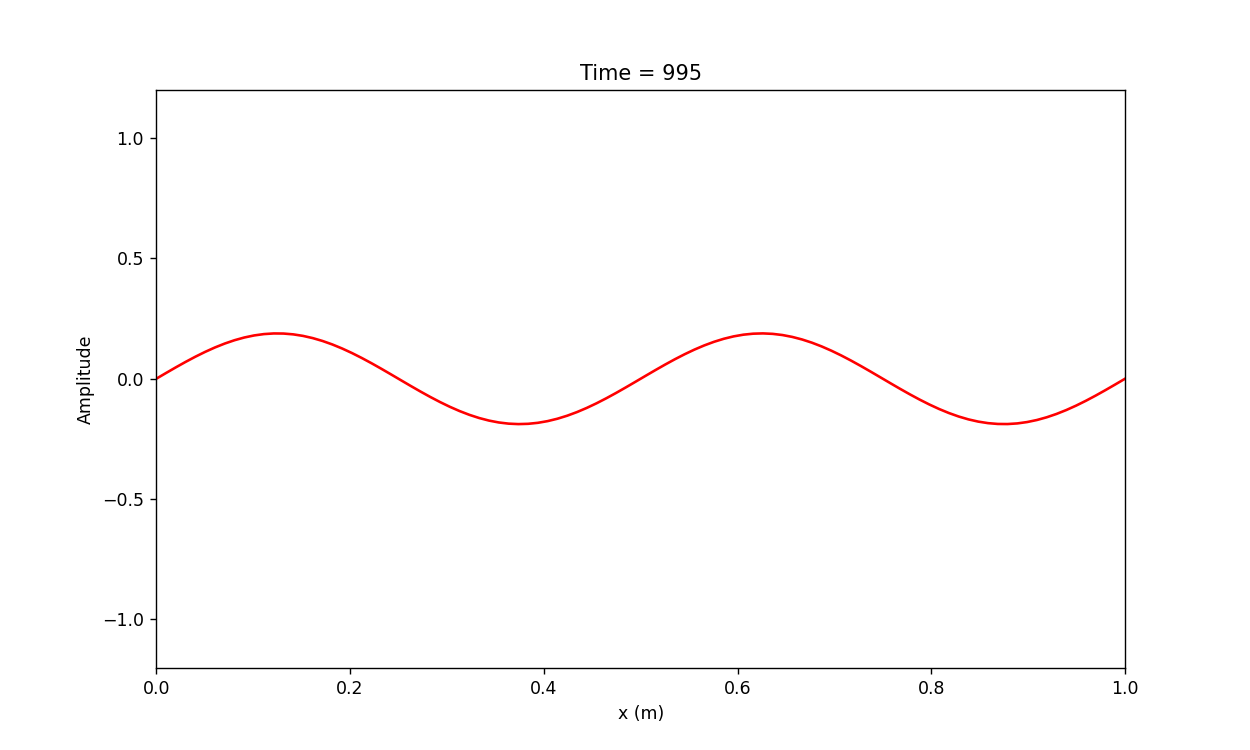

In [7]:
# Plot Snapshot
# ---------------------------------------------------------------------------
# Initialize coordinate
# ---------------------
x    = np.arange(nx)
x    = x * dx       # coordinate in x-direction


# Initialize empty pressure
# -------------------------
u    = np.sin(4*np.pi*x/L) # u at time n (now)
uold = np.sin(4*np.pi*x/L) # u at time n-1 (past)
unew = np.sin(4*np.pi*x/L) # u at time n+1 (present)
d2ux = np.zeros(nx) # 2nd space derivative of u (chosen to be zero, but it's not.)

# Initialize model (assume homogeneous model)
# -------------------------------------------
c    = np.zeros(nx)
c    = c + c0       # initialize wave velocity in model


# Plot position configuration
# ---------------------------
plt.ion()
fig2  = plt.figure(figsize=(10, 6))
gs2   = gridspec.GridSpec(1,1,width_ratios=[1],hspace=0.3, wspace=0.3)

# Plot 1D wave propagation
# ------------------------
# Note: comma is needed to update the variable
ax3  = plt.subplot(gs2[0])
up31,= ax3.plot(x, u, color = 'red') # plot amplitude update each time step
ax3.set_xlim(0, L)
#ax3.set_ylim(-1.2, 1.2)
ax3.set_title('Time = 0')
ax3.set_xlabel('x (m)')
ax3.set_ylabel('Amplitude')

plt.show()

In [8]:
# 1D Wave Propagation (Finite Difference Solution) 
# ------------------------------------------------

# Loop over time
for it in range(nt):

    # 2nd derivative in space
    
    u[0] = 0  # boundary condition
    u[-1] = 0
    
    for i in range(1, nx - 1):
        d2ux[i] = (u[i + 1] - 2 * u[i] + u[i - 1]) / (dx**2)


    # Time Extrapolation
    # ------------------
    unew = 2 * u - uold + (c**2) * (dt**2) * d2ux
    
            
    # Remap Time Levels
    # -----------------
    uold, u = u, unew
    
    # Plot pressure field
    # -------------------------------------
    if (it % idisp) == 0:
        ax3.set_title('Time = %d' % it)
        ax3.set_ylim(-1.2, 1.2)
        # plot around propagating wave
        up31.set_ydata(u)
        plt.gcf().canvas.draw() # this redraws the plot after each iteration